# 2.4 Three Particles Kinematics
In this exercise we study kinematics for the decay to three particles.
We will study available phase space using subchannel variables representations.
The exercise reads:
![Exercise](pict/Exercise-2.4.1.png)

## Define the range function
The expression of the limits of $\sigma_3$-variable (answer to the fourth bullet):
$$
\sigma_1^{\pm} = s+m_1^2-\frac{(\sigma_3+m_1^2-m_2^2)(s+\sigma_3-m_3^2)}{2s} \mp \frac{\lambda^{1/2}(\sigma_3,m_1^2,m_2^2)\lambda^{1/2}(s,\sigma_3,m_3^2)}{2s}
$$

Code it as a fuction `σ1lims(σ3,s,m1sq,m2sq,m3sq)` which returns two numbers for the upper and the lower limit.

In [43]:
λ(x,y,z) =  x^2+y^2+z^2-2*x*y-2*y*z-2*z*x
function σ1lims(σ3,s,m1sq,m2sq,m3sq)
    λλ = λ(σ3,m1sq,m2sq)λ(s,σ3,m3sq)
    λλ < 0 && error("unphysical input to the range function: λλ = $λλ")
    s+m1sq-(σ3+m1sq-m2sq)*(s+σ3-m3sq)/(2σ3)-sqrt(λλ)/(2σ3) * [1,-1]
end

σ1lims (generic function with 1 method)

Then the available kinematical range for the certain $s$ is given by
$$
\begin{align}
(m_1+m_2)^2\le &\,\sigma_3 \le (\sqrt{s}-m_3)^2\\
\sigma_1^{+}(\sigma_3,s) \le & \,\sigma_1 \le \sigma_1^{-}(\sigma_3,s)
\end{align}
$$

In [4]:
using Plots

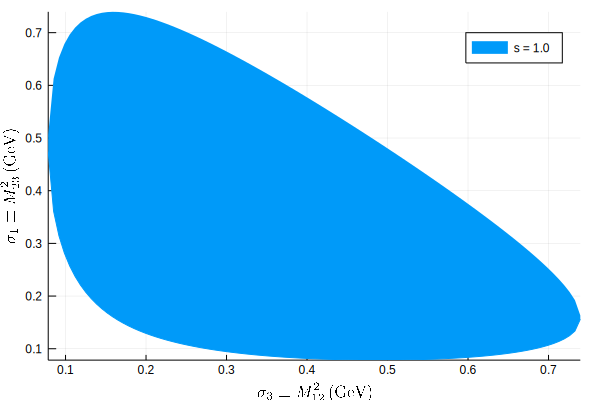

In [84]:
let s = 1.0^2
    mπ=0.14; mπ2=mπ^2
    σ3 = linspace(4mπ2+1e-4,(√s-mπ)^2-1e-4,100)
    cal = hcat(σ1lims.(σ3,s,mπ2,mπ2,mπ2)...)
    plot(xlab="\$\\sigma_3\\equiv M_{12}^2\\,\\mathrm{(GeV)}\$",
        ylab="\$\\sigma_1\\equiv M_{23}^2\\,\\mathrm{(GeV)}\$")
    plot!(σ3, cal[1,:], fillrange=cal[2,:], lab="s = $s GeV")
end

## Check how the size of the plot chages
Changing the value of the total invariant mass square $s$, you can observe that size of the Datitz plot changes. It indicates that as high the energy of the system as bigger the available phase space for the produced particles. 

In [74]:
using Interact # to have movable toggle

Interact.Options{:SelectionSlider,Float64}(125: "input-32" = 2.086734693877551 Float64 , "s", 2.086734693877551, "2.086734693877551", 25, Interact.OptionDict(DataStructures.OrderedDict("0.25"=>0.25,"0.32653061224489793"=>0.326531,"0.4030612244897959"=>0.403061,"0.47959183673469385"=>0.479592,"0.5561224489795918"=>0.556122,"0.6326530612244898"=>0.632653,"0.7091836734693877"=>0.709184,"0.7857142857142857"=>0.785714,"0.8622448979591837"=>0.862245,"0.9387755102040817"=>0.938776…), Dict(2.08673=>"2.086734693877551",3.31122=>"3.311224489795918",3.54082=>"3.5408163265306123",1.93367=>"1.933673469387755",3.84694=>"3.8469387755102042",2.69898=>"2.6989795918367347",3.77041=>"3.770408163265306",2.54592=>"2.545918367346939",1.85714=>"1.8571428571428572",3.92347=>"3.923469387755102"…)), Any[], Any[], true, "horizontal", true)

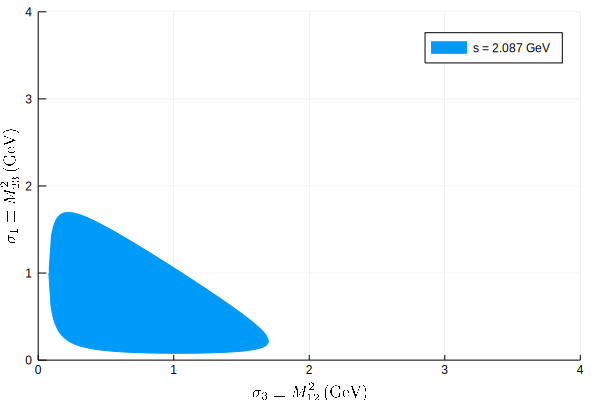

In [85]:
@manipulate for s in linspace(0.5^2,2.0^2,50)
    mπ=0.14; mπ2=mπ^2
    σ3 = linspace(4mπ2+1e-4,(√s-mπ)^2-1e-4,100)
    cal = hcat(σ1lims.(σ3,s,mπ2,mπ2,mπ2)...)
    plot(xlab="\$\\sigma_3\\equiv M_{12}^2\\,\\mathrm{(GeV)}\$",
        ylab="\$\\sigma_1\\equiv M_{23}^2\\,\\mathrm{(GeV)}\$",
        xlim=(0,4), ylim=(0,4))
    plot!(σ3, cal[1,:], fillrange=cal[2,:], lab="s = $(round(s,3)) GeV")
end

## Check how the shape changes
In this plot we do not fix the ranges of the plot,
i.e. the $x$-axis and the $y$-axis will always rescale when the value of the $s$ is changed.

Interact.Options{:SelectionSlider,Float64}(129: "input-33" = 2.0555555555555554 Float64 , "e", 2.0555555555555554, "2.0555555555555554", 5, Interact.OptionDict(DataStructures.OrderedDict("0.5"=>0.5,"0.8888888888888888"=>0.888889,"1.2777777777777777"=>1.27778,"1.6666666666666667"=>1.66667,"2.0555555555555554"=>2.05556,"2.4444444444444446"=>2.44444,"2.8333333333333335"=>2.83333,"3.2222222222222223"=>3.22222,"3.611111111111111"=>3.61111,"4.0"=>4.0…), Dict(2.05556=>"2.0555555555555554",2.44444=>"2.4444444444444446",4.0=>"4.0",0.5=>"0.5",3.22222=>"3.2222222222222223",1.66667=>"1.6666666666666667",1.27778=>"1.2777777777777777",2.83333=>"2.8333333333333335",0.888889=>"0.8888888888888888",3.61111=>"3.611111111111111"…)), Any[], Any[], true, "horizontal", true)

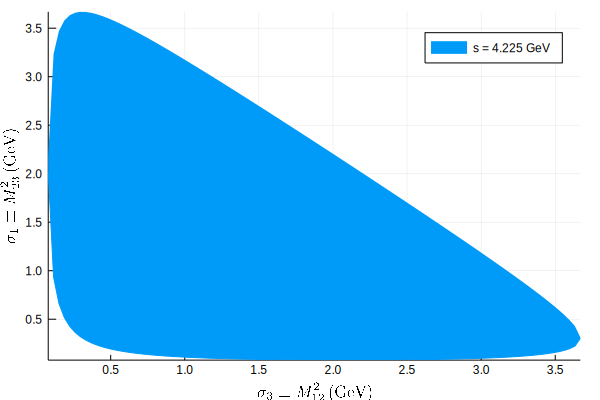

In [86]:
@manipulate for e in linspace(0.5,4.0,10)
    s = e^2
    mπ=0.14; mπ2=mπ^2
    σ3 = linspace(4mπ2+1e-4,(√s-mπ)^2-1e-4,100)
    cal = hcat(σ1lims.(σ3,s,mπ2,mπ2,mπ2)...)
    plot(xlab="\$\\sigma_3\\equiv M_{12}^2\\,\\mathrm{(GeV)}\$",
        ylab="\$\\sigma_1\\equiv M_{23}^2\\,\\mathrm{(GeV)}\$")#, xlim=(0,2), ylim=(0,2)
    plot!(σ3, cal[1,:], fillrange=cal[2,:], lab="s = $(round(s,3)) GeV")
end